## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
print(pio.templates)

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']



## Data Prepartion

In [2]:
df = pd.read_csv(r'Titanic-Dataset.csv')

In [3]:
df.shape

(891, 12)

**How many people are survived or not?**

In [4]:
fig = px.pie(
    values=[len(df[df['Survived']==1]),  len(df[df['Survived']==0])],
    names=['Survived', 'Not Survived'],
    title='Survival Distribution',
    hover_name=['Survived', 'Not Survived'],
    height=700,
    opacity=0.9,
    template='plotly_dark'
)
fig.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Filling Null Values**

In [7]:
df.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

## Cleaning and Exploring data

In [8]:
df=df.dropna(subset=['Embarked'])
df['Age']=df['Age'].fillna(df['Age'].median())

In [9]:
df['Has_cabin']=df['Cabin'].notnull().astype(int)
df=df.drop(columns='Cabin')

**How many passengers got cabin?**

In [10]:
df['Has_cabin'].value_counts()

Has_cabin
0    687
1    202
Name: count, dtype: int64

Analyzing categorical features:


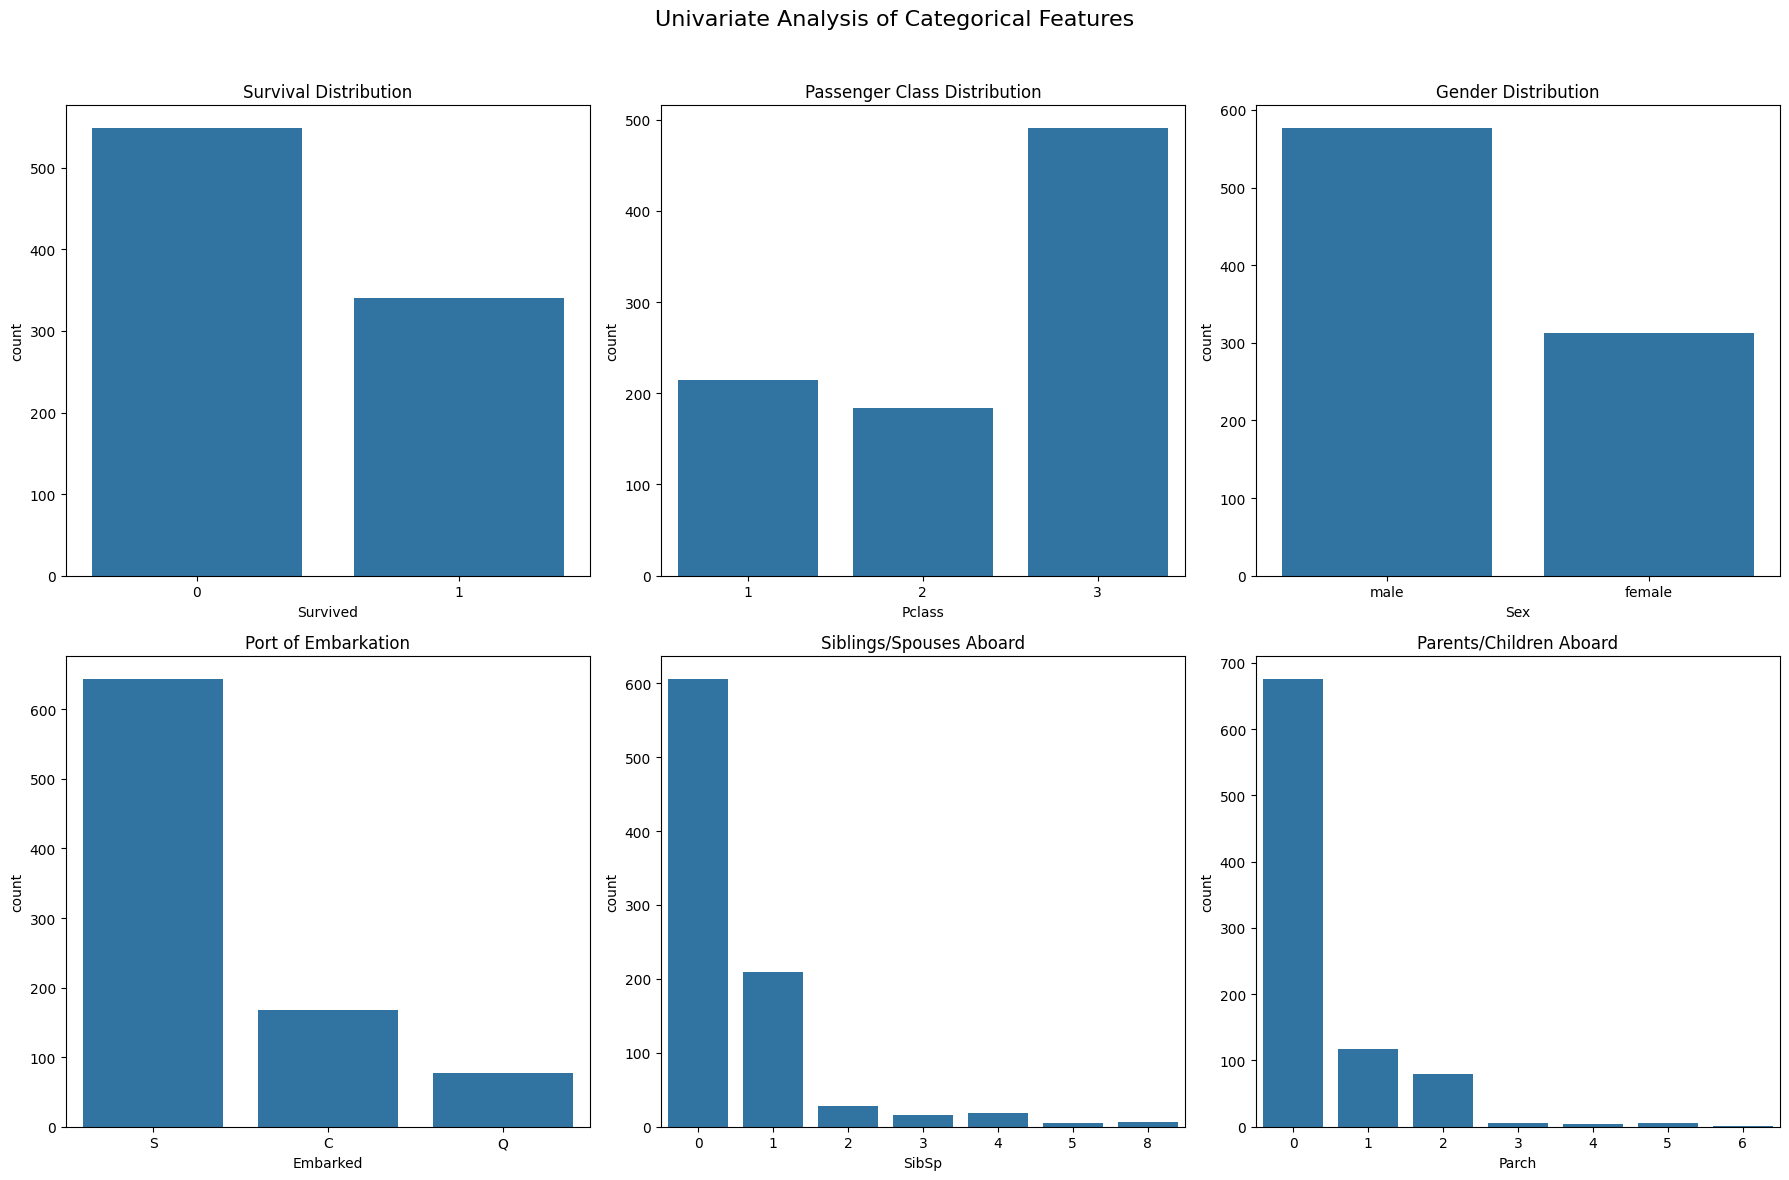

In [11]:
print("Analyzing categorical features:")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Analyzing numerical features:


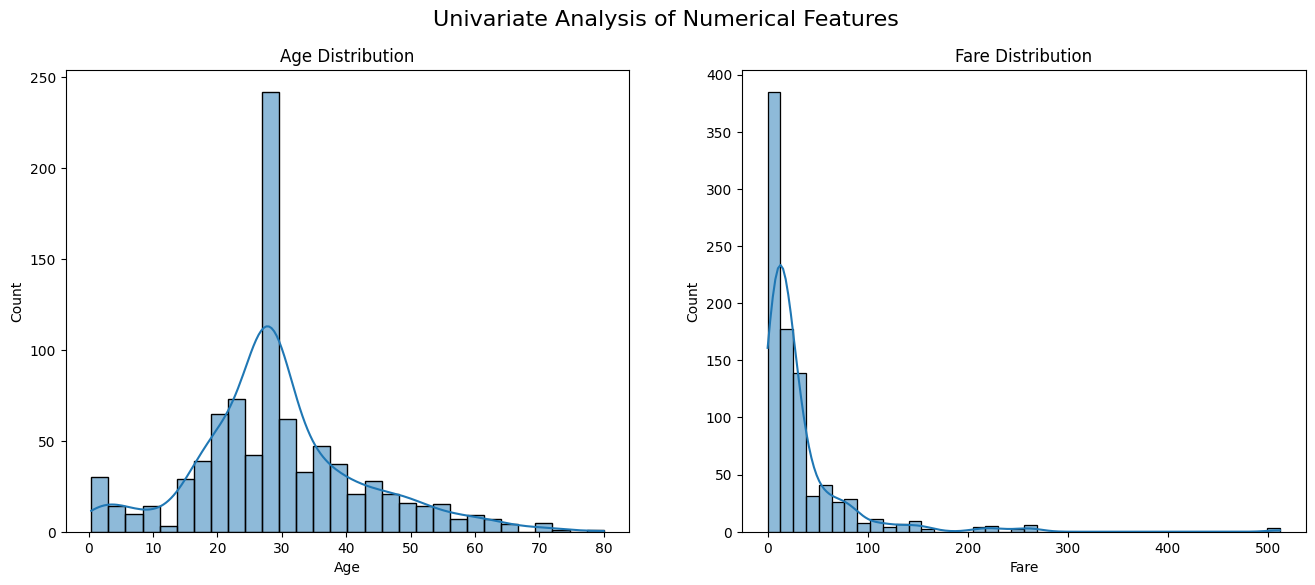

In [12]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**How many passengers are male or female?**

In [13]:
fig = px.pie(
    values=[len(df[df['Sex']=='male']), len(df[df['Sex']=='female'])],
    names=['Male', 'Female'],
    hover_name=['Male', 'Female'],
    title='Gender Distribution',
    height=700,
    opacity=0.9,
    template='plotly_dark'
)
fig.show()

In [14]:
Child = df[df['Age'] < 18]
Adult = df[(df['Age'] >= 18) & (df['Age'] <= 40)]
Old   = df[df['Age'] > 60]
fig = px.pie(
    
    values=[len(Child), len(Adult), len(Old)],
    names=['Child', 'Adult', 'Old'],
    hover_name=['Child', 'Adult', 'Old'],
    title='Category classification',
    opacity=0.9,
    template='plotly_dark',
    height=700
)
fig.show()

## Survival Rate

In [15]:
total_passengers = len(df)
total_survived = len(df[df['Survived']==1])
child_survival = df[df['Survived']==1]
Adult_survival = df[df['Survived']==1]
Old_survival = df[df['Survived']==1]
fig = make_subplots(rows=1, cols=4, subplot_titles=["Children", "Adults", "Old", "Overall"])

fig.add_trace(go.Bar(
    x=["Total", "Survived"],
    y=[len(df), len(child_survival)],
    name="Children",
    marker_color=['#636EFA', '#00CC96']
), row=1, col=1)

fig.add_trace(go.Bar(
    x=["Total", "Survived"],
    y=[len(Adult), len(Adult_survival)],
    name="Adults",
    marker_color=['#636EFA', '#00CC96']
), row=1, col=2)

fig.add_trace(go.Bar(
    x=["Total", "Survived"],
    y=[len(Old), len(Old_survival)],
    name="Old",
    marker_color=['#636EFA', '#00CC96']
), row=1, col=3)

fig.add_trace(go.Bar(
    x=["Total", "Survived"],
    y=[total_passengers, total_survived],
    name="Overall",
    marker_color=['#636EFA', '#00CC96']
), row=1, col=4)

fig.update_layout(
    title="Total vs Survival Rate by Category",
    showlegend=False,
    height=700,
    template="plotly_dark"
)

fig.show()

In [16]:
df['FamilySize'] = df['SibSp']+df['Parch']+1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


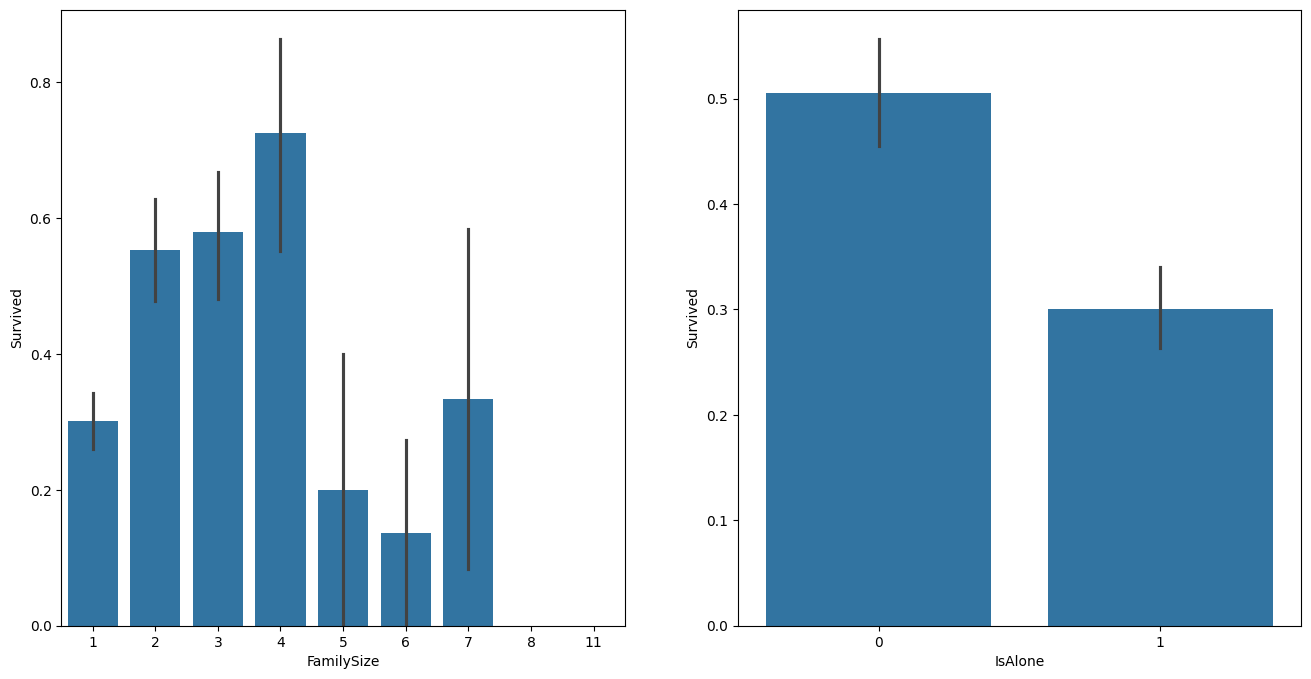

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df)
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df)
plt.show()

In [18]:
fig = make_subplots(rows=1, cols=4,
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=["Children", "Adults", "Old", "Overall"])

fig.add_trace(go.Pie(
    labels=["Total Child", "Survived"],
    values=[len(Child), len(child_survival)],
    name="Children"
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=["Total Adult", "Survived"],
    values=[len(Adult), len(Adult_survival)],
    name="Adults"
), row=1, col=2)

fig.add_trace(go.Pie(
    labels=["Total Old", "Survived"],
    values=[len(Old), len(Old_survival)],
    name="Old"
), row=1, col=3)

fig.add_trace(go.Pie(
    labels=["Total", "Survived"],
    values=[total_passengers, total_survived],
    name="Overall"
), row=1, col=4)

fig.update_layout(
    title="Total vs Survival Rate by Category (Pie Charts)",
    height=700,
    template="plotly_dark"
)

fig.show()

**Passenger class indicate socio-economic status**

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

upper_class = df[df['Pclass']==1]
middle_class = df[df['Pclass']==2]
lower_class = df[df['Pclass']==3]

upper_class_survived = df[(df['Pclass']==1) & (df['Survived']==1)]
middle_class_survived = df[(df['Pclass']==2) & (df['Survived']==1)]
lower_class_survived = df[(df['Pclass']==3) & (df['Survived']==1)]

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Passenger Class', 'Passenger Survived'])

fig.add_trace(go.Pie(
    labels=['Upper Class', 'Middle Class', 'Lower Class'],
    values=[len(upper_class), len(middle_class), len(lower_class)],
    name='Passenger'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=['Upper Class Survived', 'Middle Class Survived', 'Lower Class Survived'],
    values=[len(upper_class_survived), len(middle_class_survived), len(lower_class_survived)],
    name='Passenger Survived'
), row=1, col=2)

fig.update_layout(
    title='Total Passenger vs Passenger Survived by Class',
    height=700,
    template='plotly_dark'
)

fig.show()


**How many travelled alone or with family?**

In [20]:
not_alone = df[(df['SibSp']>0) | (df['Parch']>0)]
alone = df[(df['SibSp']==0) & (df['Parch']==0)]

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['With family', 'alone'])

fig.add_trace(go.Pie(
    labels=['Total Passengers', 'With Family'],
    values=[len(df), len(not_alone)],
    name='Passenger'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=['Alone', 'With Family'],
    values=[len(alone), len(not_alone)],
    name='Passenger'
), row=1, col=2)

fig.update_layout(
    title='Total Passengers vs With Family vs Alone',
    height=700,
    template="plotly_dark"
)

fig.show()

**How many people boarded from which place?**

In [21]:
S_df = df[df['Embarked']=='S']
C_df = df[df['Embarked']=='C']
Q_df = df[df['Embarked']=='Q']

fig = px.pie(
    values=[len(S_df), len(C_df), len(Q_df)],
    title='Boarded from which place',
    names=['Southampton (England)', 'Cherbourg (France)', 'Queenstown (Ireland)'],
    hover_name=['Southampton (England)', 'Cherbourg (France)', 'Queenstown (Ireland)'],
    opacity=.9,
    height=700,
    template='plotly_dark'
)
fig.show()

## Feature Engineering

In [22]:
pclass_total = df['Pclass'].value_counts().sort_index()
pclass_survived = df[df['Survived']==1]['Pclass'].value_counts().sort_index()

sex_total = df['Sex'].value_counts()
sex_survived = df[df['Survived']==1]['Sex'].value_counts()

embarked_total = df['Embarked'].value_counts()
embarked_survived = df[df['Survived']==1]['Embarked'].value_counts()

cabin_total = df['Has_cabin'].value_counts()
cabin_survived = df[df['Survived']==1]['Has_cabin'].value_counts()

In [23]:
fig = make_subplots(rows=1, cols=4, subplot_titles=["Survival by Pclass", "Survival by Sex", "Survival by Embarked", "Survival by Has_cabin"])
fig.add_trace(go.Bar(
    x=pclass_total.index.astype(str),
    y=pclass_total.values,
    name="Total",
    marker_color="#636EFA"
), row=1, col=1)
fig.add_trace(go.Bar(
    x=pclass_survived.index.astype(str),
    y=pclass_survived.values,
    name="Survived",
    marker_color="#00CC96"
), row=1, col=1)
fig.add_trace(go.Bar(
    x=sex_total.index,
    y=sex_total.values,
    name="Total",
    marker_color="#636EFA"
), row=1, col=2)
fig.add_trace(go.Bar(
    x=sex_survived.index,
    y=sex_survived.values,
    name="Survived",
    marker_color="#00CC96"
), row=1, col=2)
fig.add_trace(go.Bar(
    x=embarked_total.index,
    y=embarked_total.values,
    name="Total",
    marker_color="#636EFA"
), row=1, col=3)
fig.add_trace(go.Bar(
    x=embarked_survived.index,
    y=embarked_survived.values,
    name="Survived",
    marker_color="#00CC96"
), row=1, col=3)

fig.add_trace(go.Bar(
    x=cabin_total.index.astype(str),
    y=cabin_total.values,
    name="Total",
    marker_color="#636EFA"
), row=1, col=4)
fig.add_trace(go.Bar(
    x=cabin_survived.index.astype(str),
    y=cabin_survived.values,
    name="Survived",
    marker_color="#00CC96"
), row=1, col=4)
fig.update_layout(
    title="Bivariate Analysis with Survival",
    barmode="group",
    height=700,
    template="plotly_dark"
)

fig.show()

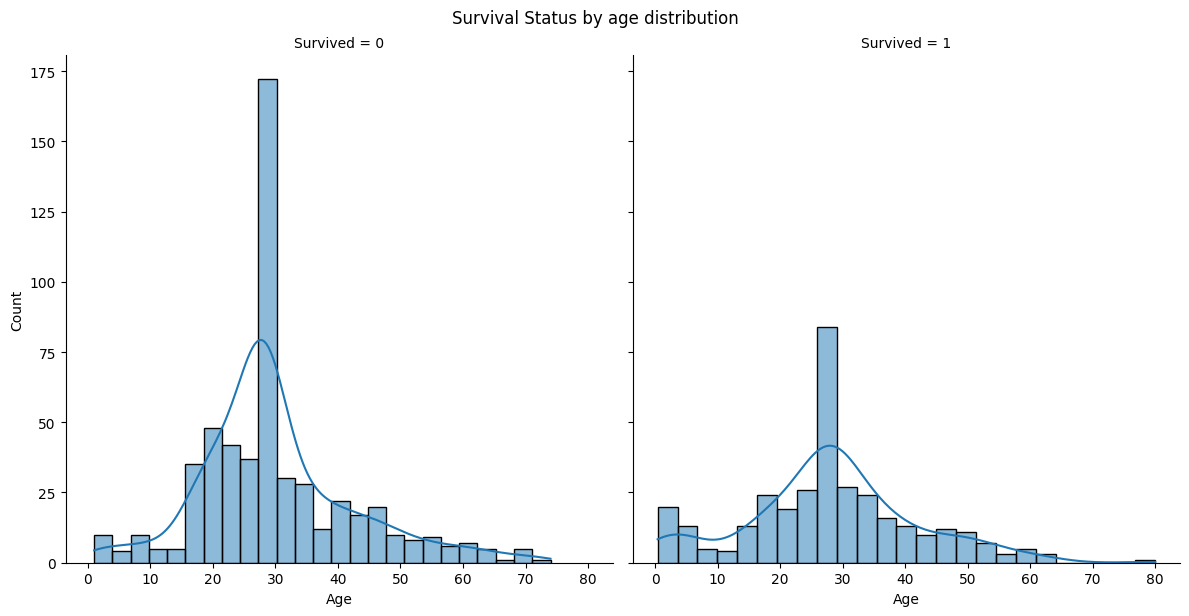

In [24]:
fig=sns.FacetGrid(data=df, col='Survived', height=6)
fig.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Survival Status by age distribution', y=1.02)
plt.show()

*describe() func used for checking outliers*

In [25]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

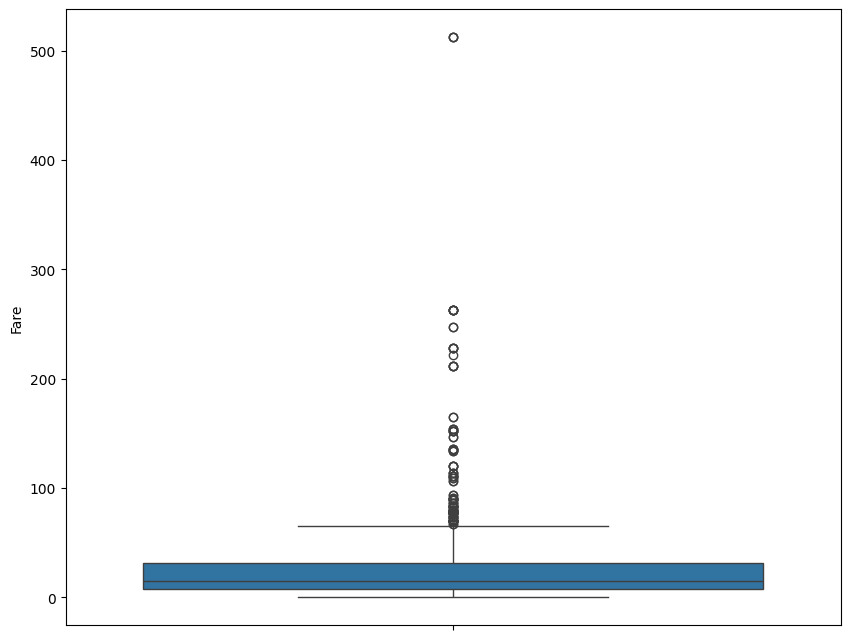

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=df)
plt.ylabel='Fare'
plt.show()

In [27]:
df['Title']=df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

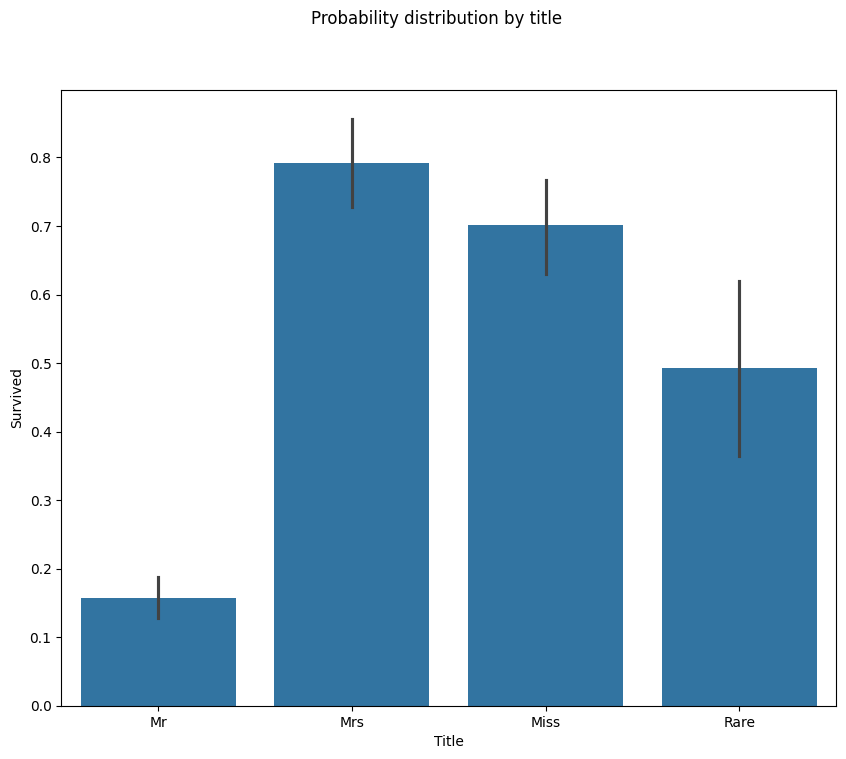

In [28]:
df['Title']=df['Title'].replace(['Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], 'Rare')
df['Title']=df['Title'].replace('Mlle', 'Miss')
df['Title']=df['Title'].replace('Mme', 'Miss')
df['Title']=df['Title'].replace('Ms', 'Mrs')

plt.figure(figsize=(10, 8))
sns.barplot(x='Title', y='Survived', data=df)
plt.suptitle('Probability distribution by title')
plt.show()

TypeError: 'str' object is not callable

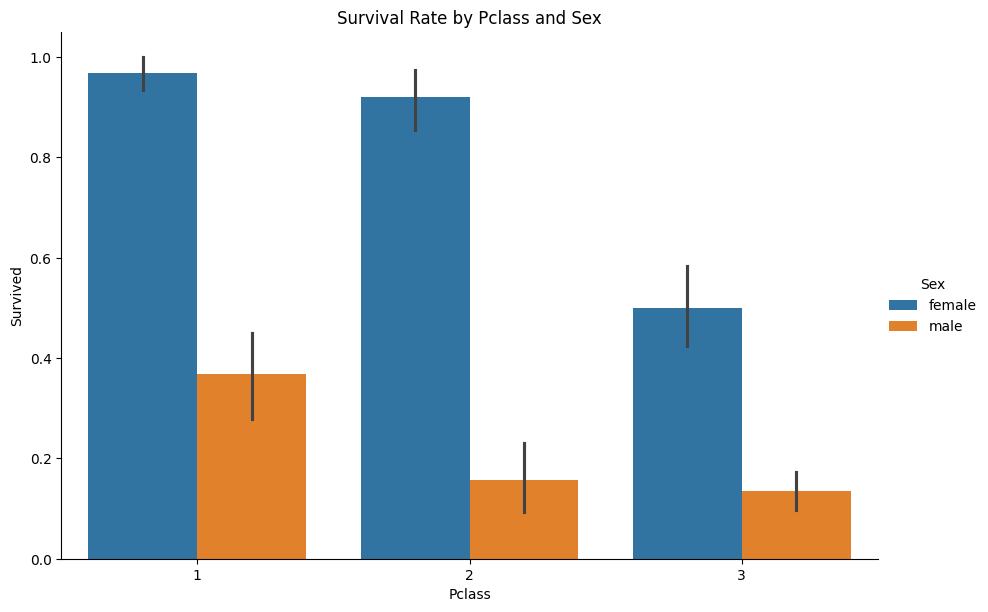

In [35]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel("Survival Probability")
plt.show()

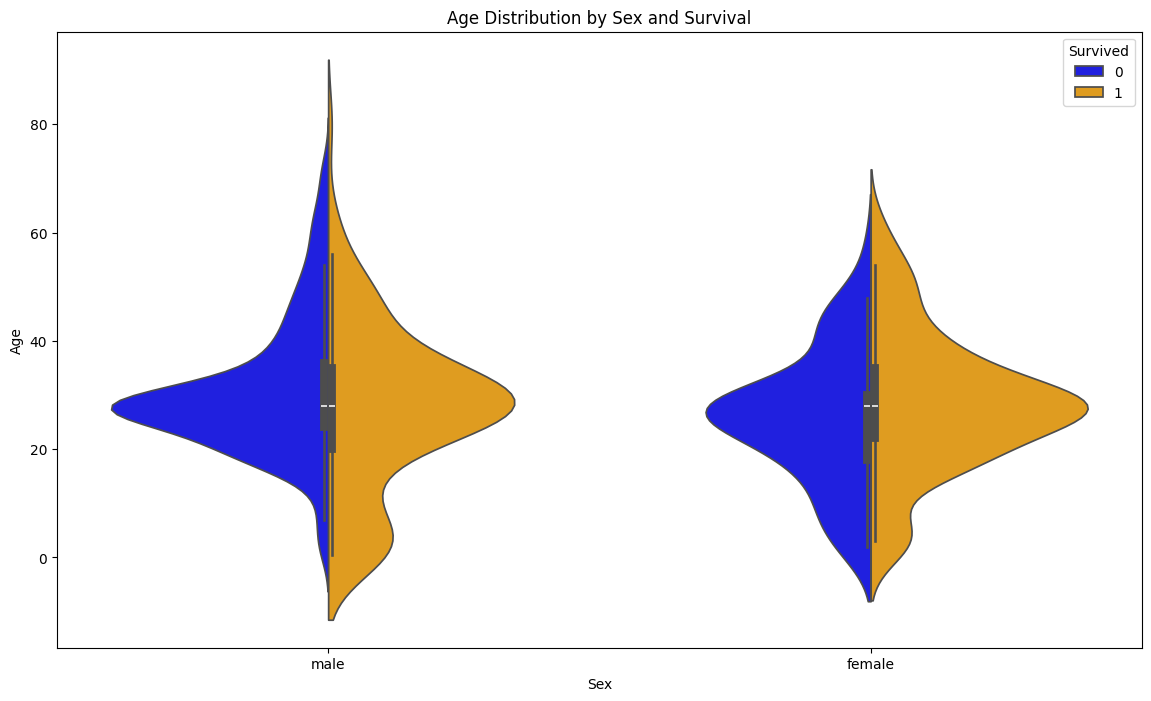

In [33]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

## Correlation Analysis 

In [31]:
df.corr(numeric_only=True)

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.031319 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.069822 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.336512  0.081656  0.016824   
Age             0.031319 -0.069822 -0.336512  1.000000 -0.232543 -0.171485   
SibSp          -0.057686 -0.034040  0.081656 -0.232543  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.171485  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.093707  0.160887  0.217532   
Has_cabin       0.020045  0.313435 -0.723815  0.235550 -0.038657  0.039101   
FamilySize     -0.040258  0.018277  0.064221 -0.244631  0.890654  0.782988   
IsAlone         0.057649 -0.206207  0.138553  0.169518 -0.584186 -0.583112   

                 Fare  Has_cabin  FamilySize   IsAlone  
PassengerId  0.012703   0.020045   -0.040258  0.057649  
Survived     0.255290   0.313435    0.018277 -0.206207  
Pclass      -0.548193  -0.723815    0.064221  0.138553  
Age          0.093707   0.235550   -0.244631  0.169518  
SibSp        0.160887  -0.038657    0.890654 -0.584186  
Parch        0.217532   0.039101    0.782988 -0.583112  
Fare         1.000000   0.480425    0.218658 -0.274079  
Has_cabin    0.480425   1.000000   -0.006888 -0.162116  
FamilySize   0.218658  -0.006888    1.000000 -0.690654  
IsAlone     -0.274079  -0.162116   -0.690654  1.000000

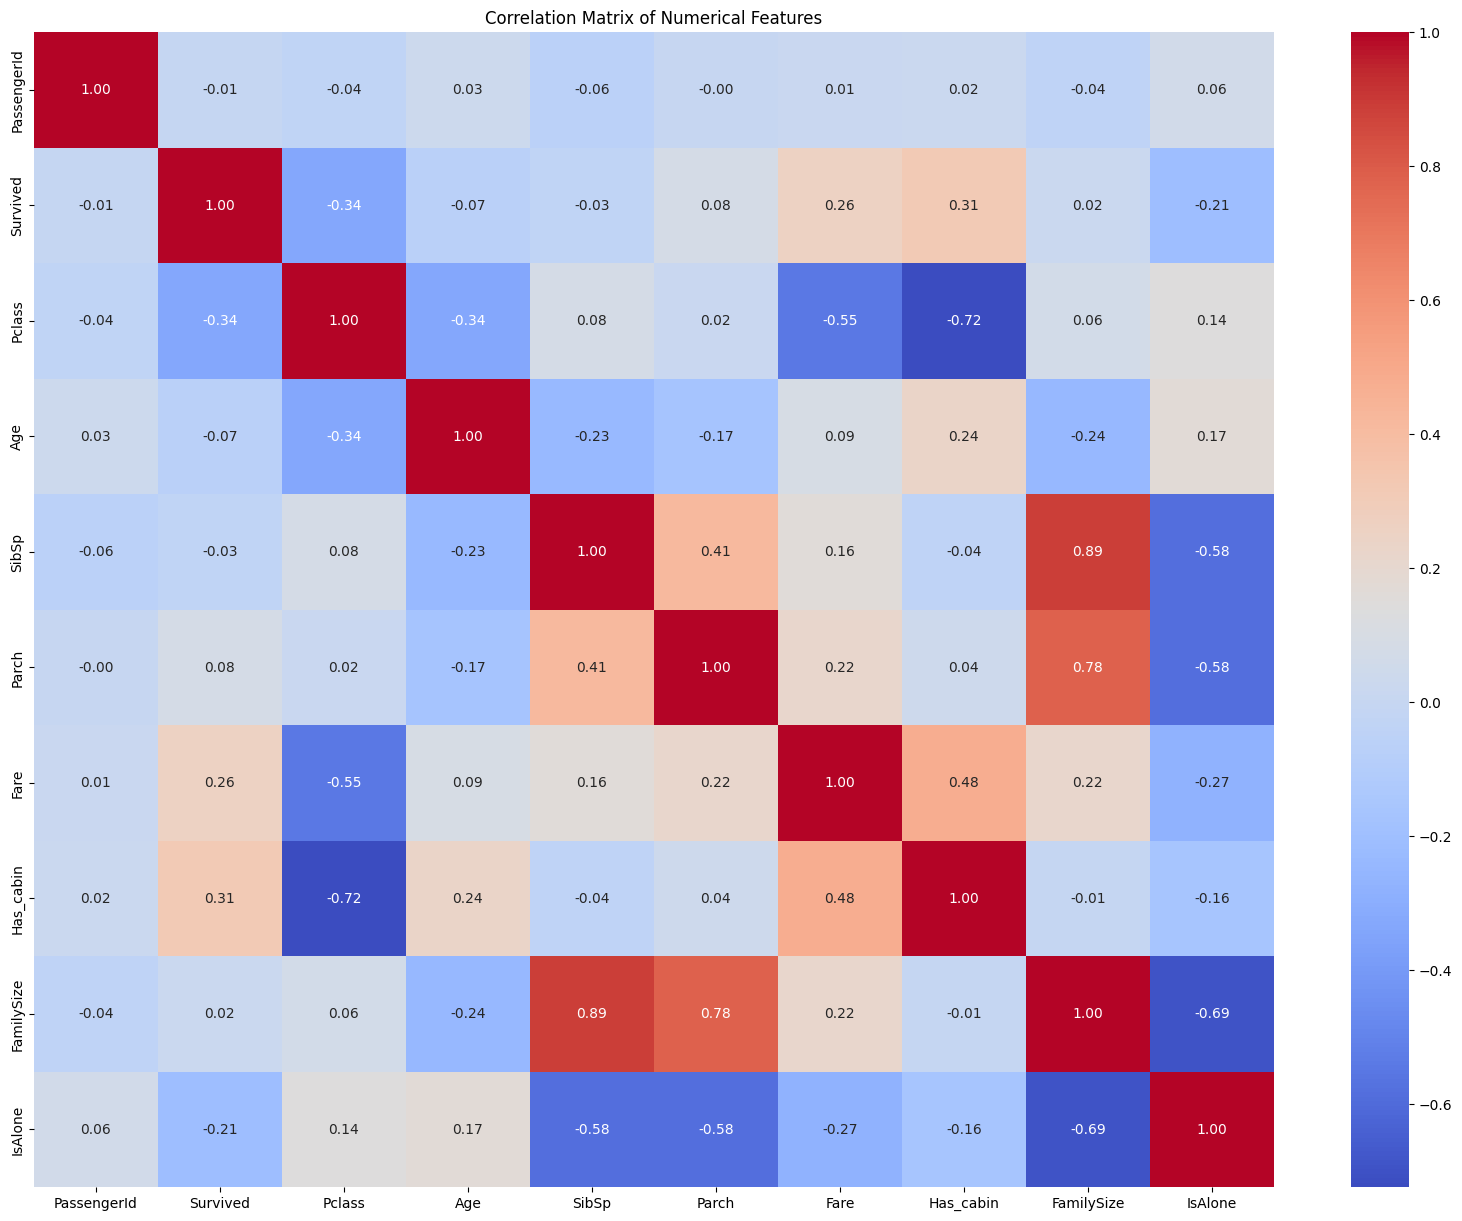

In [32]:
plt.figure(figsize=(20, 15))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [37]:
import importlib, matplotlib
importlib.reload(matplotlib.pyplot)


<module 'matplotlib.pyplot' from 'c:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [38]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 174.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
profile.to_file("Titanic_Dataset_Profiling_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]